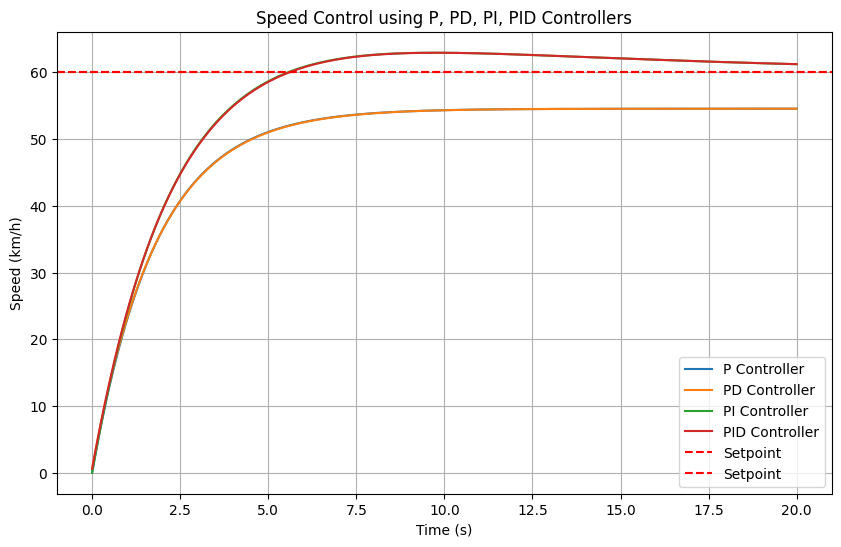

In [ ]:
!pip install control
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# Car parameters
m = 1000  # mass of the car (kg)
b = 50    # friction coefficient

# Transfer function of the car
car_tf = ctrl.TransferFunction([1], [m, b])  # 1/(ms + b)

# Time range
time = np.linspace(0, 20, 1000)

# Desired setpoint (speed)
setpoint = 60  # km/h

# Define controllers
Kp = 500  # Proportional gain
Ki = 50   # Integral gain
Kd = 10   # Derivative gain

P = ctrl.TransferFunction([Kp], [1])                  # P controller
PD = ctrl.TransferFunction([Kd, Kp], [1])            # PD controller
PI = ctrl.TransferFunction([Kp, Ki], [1, 0])         # PI controller
PID = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])    # PID controller

# Closed-loop systems
sys_P = ctrl.feedback(P * car_tf, 1)
sys_PD = ctrl.feedback(PD * car_tf, 1)
sys_PI = ctrl.feedback(PI * car_tf, 1)
sys_PID = ctrl.feedback(PID * car_tf, 1)

# Simulate responses
_, y_P = ctrl.step_response(setpoint * sys_P, time)
_, y_PD = ctrl.step_response(setpoint * sys_PD, time)
_, y_PI = ctrl.step_response(setpoint * sys_PI, time)
_, y_PID = ctrl.step_response(setpoint * sys_PID, time)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, y_P, label='P Controller')
plt.plot(time, y_PD, label='PD Controller')
plt.plot(time, y_PI, label='PI Controller')
plt.plot(time, y_PID, label='PID Controller')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Control using P, PD, PI, PID Controllers')
plt.legend()
plt.grid()
plt.show()
